# Data Mining Final Exam Part 3

    Name: Aimi Hassin
    

### Question 5

The primary objective of this question is to build a clustering model by using density-based clustering model on the dataset from Question 1. In this question, I am applying **DBSCAN** algorithm or also known as "density based spatial clustering of applications with noise". Technically, this algorithm works better than K-means clustering because it can capture clusters of complex shapes as well as has the capability to detect outliers.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

#### Loading the dataset


In [15]:
data = pd.read_csv("airbnb.csv")
data.sample(5)

,Unnamed: 0,listing_id,host_id,city,house_title,house_type,price,owner_name,no_of_reviews,rating,occupancy,no_of_guest,bedrooms_no,beds_no,bath_no
360,368,1360,100260,Orlando,"Luxury Disney Vacation- Disney,Universal,Seawo...",Entire condominium,19.0,LuxuryVacations,46,4.0,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...",4.0,1.0,2.0,1.0
229,236,1229,100129,Manhattan,Authentic Midtown Manhattan Studio,Entire apartment,135.0,Vicente,31,5.0,"['4 guests', 'Studio', '2 beds', '1 bath', '\U...",4.0,0.5,2.0,1.0
266,273,1266,100166,Manhattan,Charming Duplex in Manhattan,Entire apartment,155.0,Chito And Xavier,77,5.0,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...",4.0,1.0,2.0,1.0
113,115,1113,100013,Manhattan,Metro-luxe Tuscan Suite Private Room,Private room in apartment,75.0,Anne,272,4.5,"['4 guests', '1 bedroom', '1 bed', '1 shared b...",4.0,1.0,1.0,1.0
411,419,1411,100311,Orlando,"•15%OFF LUXURY NEAR DISNEY, UNIVERSAL & I-DRIVE•",Private room in apartment,69.0,Shaka,42,5.0,"['4 guests', '1 bedroom', '2 beds', '1 private...",4.0,1.0,2.0,1.0


In [16]:
data.describe()

,Unnamed: 0,listing_id,host_id,price,no_of_reviews,rating,no_of_guest,bedrooms_no,beds_no,bath_no
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,305.295987,1298.500000,100198.500000,113.152174,111.458194,4.678094,4.685619,1.358696,2.433110,1.220736
std,176.639943,172.772008,172.772008,62.365046,77.052685,0.330684,1.730065,0.737043,1.189587,0.598523
min,0.000000,1000.000000,99900.000000,17.000000,3.000000,3.500000,3.000000,0.500000,0.000000,1.000000
25%,153.250000,1149.250000,100049.250000,65.000000,55.000000,4.500000,4.000000,1.000000,2.000000,1.000000
50%,306.500000,1298.500000,100198.500000,95.000000,95.000000,4.500000,4.000000,1.000000,2.000000,1.000000
75%,456.750000,1447.750000,100347.750000,150.000000,155.000000,5.000000,6.000000,2.000000,3.000000,1.000000
max,611.000000,1597.000000,100497.000000,500.000000,526.000000,5.000000,16.000000,5.000000,10.000000,11.500000


In [17]:
# checking any null values
(data.isnull()).any()

Unnamed: 0       False
listing_id       False
host_id          False
city             False
house_title      False
house_type       False
price            False
owner_name       False
no_of_reviews    False
rating           False
occupancy        False
no_of_guest      False
bedrooms_no      False
beds_no          False
bath_no          False
dtype: bool

In [18]:
(data.isna()).any()

Unnamed: 0       False
listing_id       False
host_id          False
city             False
house_title      False
house_type       False
price            False
owner_name       False
no_of_reviews    False
rating           False
occupancy        False
no_of_guest      False
bedrooms_no      False
beds_no          False
bath_no          False
dtype: bool

In [19]:
# checking data types
data.dtypes

Unnamed: 0         int64
listing_id         int64
host_id            int64
city              object
house_title       object
house_type        object
price            float64
owner_name        object
no_of_reviews      int64
rating           float64
occupancy         object
no_of_guest      float64
bedrooms_no      float64
beds_no          float64
bath_no          float64
dtype: object

#### Construct a density-based clustering model and extract cluster labels and outliers to the plot

In [149]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
# Choosing only 2 attributes for visualizing purposes
dfv = data[["price", "no_of_reviews"]]

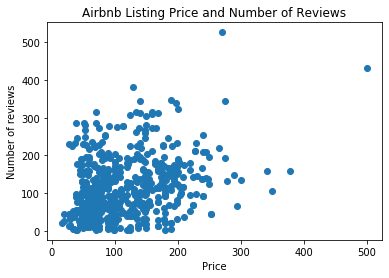

In [151]:
# Plotting the data
x = dfv['price']
y = dfv['no_of_reviews']

plt.scatter(x,y)
plt.xlabel("Price")
plt.ylabel("Number of reviews")
plt.title("Airbnb Listing Price and Number of Reviews")
plt.show()

In [152]:
# Preparing the data for clustering
df_dbscan = data[["price", "no_of_reviews"]]
df_dbscan = df_dbscan.values.astype("float32", copy = False)
df_dbscan

array([[ 91., 279.],
       [ 87., 137.],
       [165., 272.],
       ...,
       [100., 171.],
       [ 99.,  62.],
       [ 85., 114.]], dtype=float32)

In [153]:
# Normalizing the data
stscaler = StandardScaler().fit(df_dbscan)
df_dbscan = stscaler.transform(df_dbscan)

In [154]:
# Constructing the model
dbsc = DBSCAN(eps=0.2, min_samples=10).fit(df_dbscan)
core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
core_samples_mask[dbsc.core_sample_indices_] = True
labels = dbsc.labels_

**Comment:** 
Two important parameters in DBSCAN are **eps** and **min_samples**. 
"eps" specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
Meanwhile, "min_samples" refers to the minimum number of points to form a dense region. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

In [155]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 245


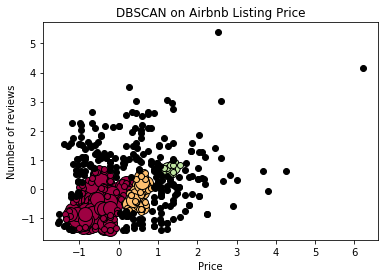

In [156]:
# Visualizing the result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.xlabel("Price")
plt.ylabel("Number of reviews")
plt.title('DBSCAN on Airbnb Listing Price')
plt.show()

**Comment:** Based on the results above, we can see that there are 3 clusteres have been formed. These clusters are represented by the colourful colours. Meanwhile, the black points in the plot indicates the outliers in the data. These outliers are the points that are neither core samples nor close enough to a cluster to be density-reachable from a core sample. Note that the points that are within a dense region are called core samples (or core points). In the context of this dataset, finding the outliers maybe useful to the Airbnb to know which Airbnb listings that have the highest amount of reviews, according to the respective price's group. This can give an insight to the company to understand better why that particular Airbnb listing has such review's numbers, regardless of good or bad reviews. So, by grouping according to the price, the company able to understand why Aribnb users leave such comments. The reviews or comments made by the Airbnb users might be because of the pricing- either it is reasonable or not.